In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from keras.callbacks import History 
history = History()
data = pd.read_csv('Google_Stock_Price_Train.csv', date_parser = True)
data = data.iloc[:,1:6]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = data[:len(data)-50] 
data_validation = data[len(data):] 
Xtrain = []
Ytrain = []
g = 0
for i in range(1, data_training.shape[0]):
    Xtrain.append(data_training[i-1:i])
    Ytrain.append(data_training[i, g])
    
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)


X_vali = []
y_vali = []

for i in range(1, data_validation.shape[0]):
    X_vali.append(data_validation[i-1:i])
    y_vali.append(data_validation[i, 0])
    
X_vali, y_vali = np.array(X_vali), np.array(y_vali)

In [94]:

regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'tanh'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(Xtrain, Ytrain,validation_data=(X_vali, y_vali), epochs=100, batch_size=32, callbacks=[history])

Epoch 1/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1777
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0341
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 11/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 13/100
38/38 [=================

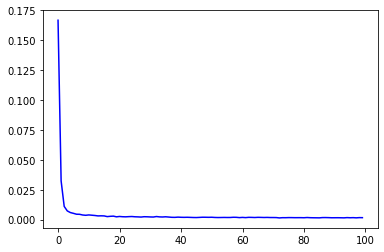

In [88]:
plt.plot(history.history['loss'], color = 'blue', label = 'loss for Predicted Google Stock Price')

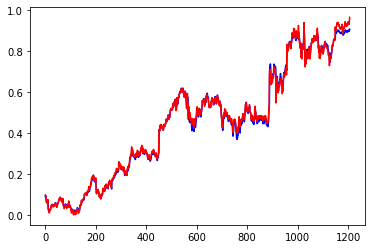

In [98]:
a = regressor.predict(Xtrain)
plt.plot(a, color = 'blue', label = 'Predicted Google Stock Price')
plt.plot(Ytrain, color = 'red', label = 'Predicted Google Stock Price')

In [105]:
data = pd.read_csv('Google_Stock_Price_Test.csv', date_parser = True)
data_test = data.iloc[:,1:6]
scaler = MinMaxScaler()
data_test = scaler.fit_transform(data_test)

Xtest = []
ytest = []

for i in range(1, data_test.shape[0]):
    Xtest.append(data_test[i-1:i])
    ytest.append(data_test[i, g])
    
Xtest, ytest = np.array(Xtest), np.array(ytest)
Xtest.shape

(19, 1, 5)

In [106]:
a = regressor.predict(Xtest)

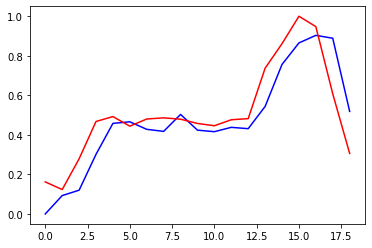

In [107]:
plt.plot(a, color = 'blue', label = 'Predicted Opening Price')
plt.plot(ytest, color = 'red', label = 'Real Opening Price')